# **Import Library**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Imports the main Python libraries for data analysis and visualization: Pandas, NumPy, Matplotlib, and Seaborn.

# **Import Dataset**

In [ ]:
titanic = sns.load_dataset('titanic')

Loads the Titanic dataset from Seaborn’s built-in collection and stores it in a DataFrame called titanic.

# **Statistical Descriptive Analysis**

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


The function of the head is to display the first 5 (0-4) rows of the dataset to get a quick look at the structure and values.

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


And "describe function" provides summary statistics for the numeric columns to understand distributions and spot unusual values.

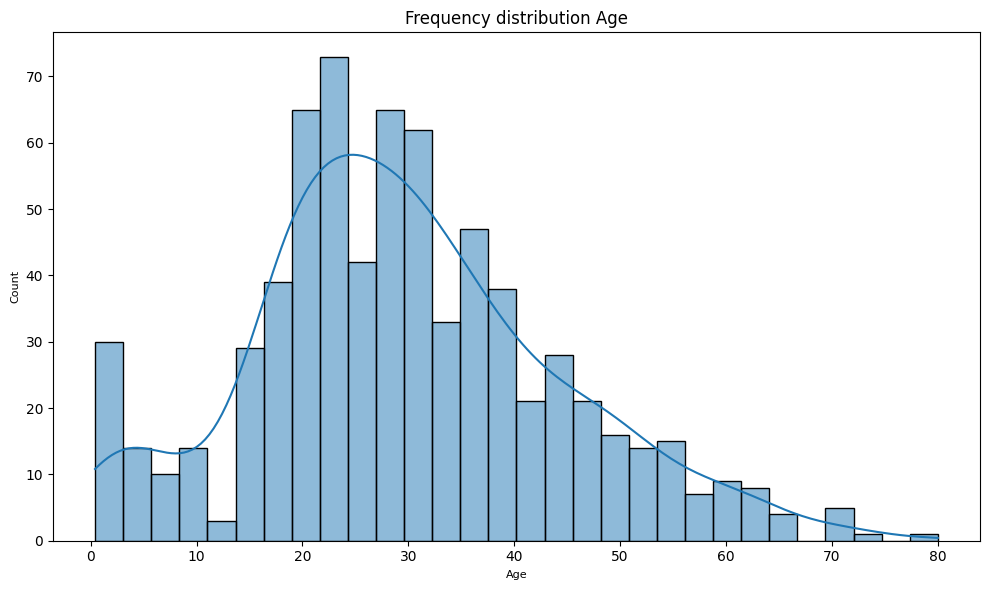

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.histplot(titanic["age"].dropna(), bins=30, kde=True, ax=ax)
ax.set_title("Frequency distribution Age", fontsize=12)
ax.set_xlabel("Age", fontsize=8)
ax.set_ylabel("Count", fontsize=8)

plt.tight_layout()
plt.show()

The graph above shows the overall distribution of passenger ages. This helps identify common age groups (like many passengers being young adults) and whether ages are evenly spread or skewed, which is useful for understanding demographics.

## **Categorical Data Detection**

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Runs titanic.info() to display the dataset’s structure, including row counts, column names, data types, and how many non-null values each column has. This helps detect missing values and identify categorical or numerical features.

## **Data Visualisation**

### Bar chart

The bar charts below display the distribution of survival based on the Gender, Passenger class, and Port of embarkation. The bar chart is chosen because the data only has two types of values. (e.g., gender has only two categories: male and female).

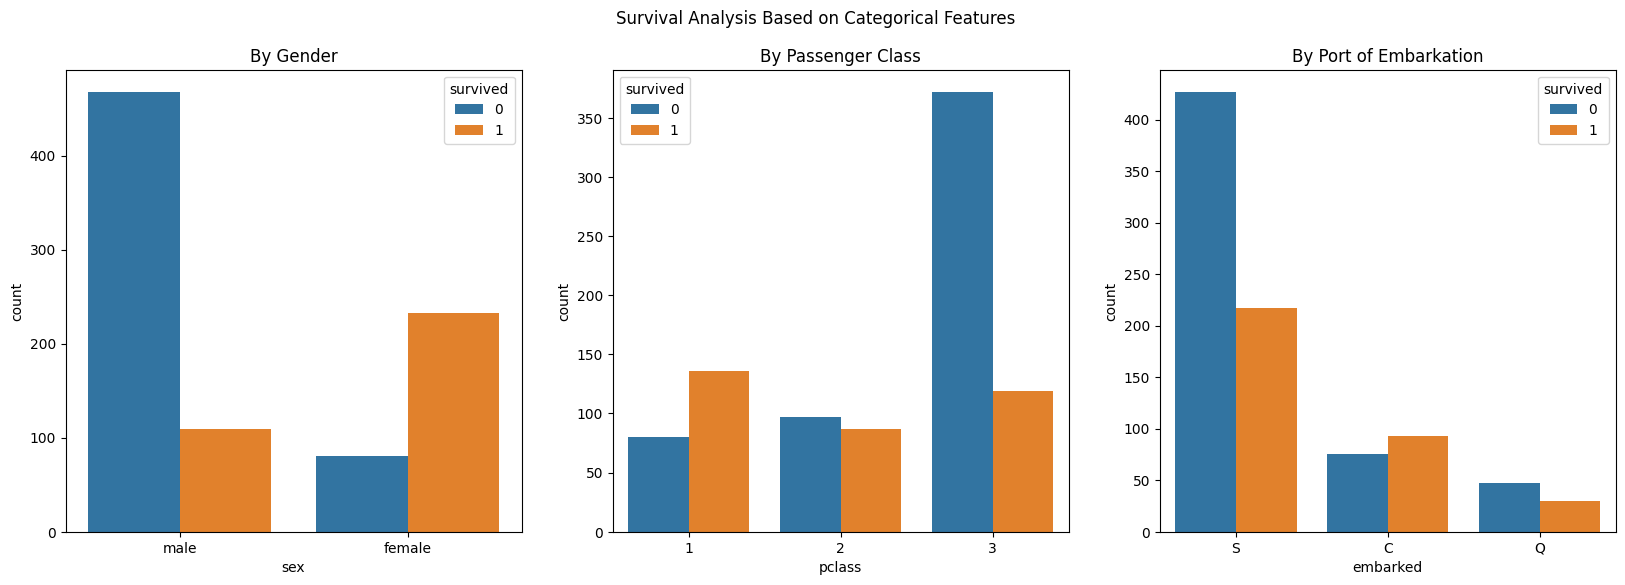

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Survival Analysis Based on Categorical Features')
sns.countplot(ax=axes[0], data=titanic, x='sex', hue='survived')
axes[0].set_title('By Gender')
sns.countplot(ax=axes[1], data=titanic, x='pclass', hue='survived')
axes[1].set_title('By Passenger Class')
sns.countplot(ax=axes[2], data=titanic, x='embarked', hue='survived')
axes[2].set_title('By Port of Embarkation')
plt.show()

### Histogram

The histograms below display the distribution of survival based on the age and fare. The histogram is used as a method of visualisation because it is the most suitable way to display the kind of data that has multiple types of values, like age and fare in this case.

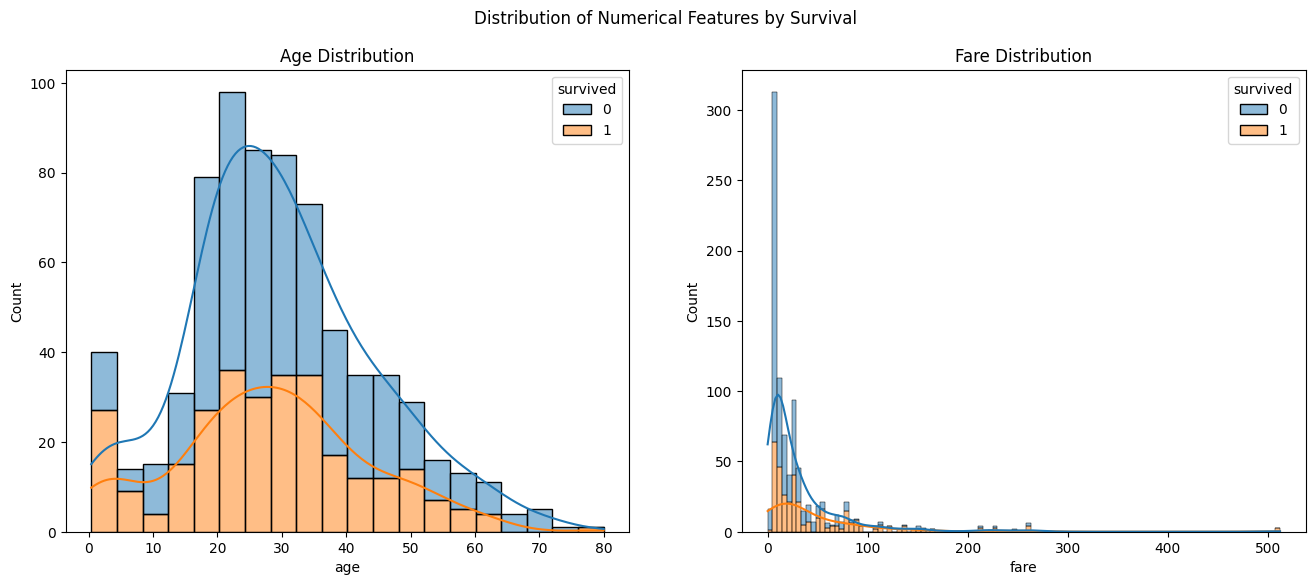

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Numerical Features by Survival')
sns.histplot(ax=axes[0], data=titanic, x='age', hue='survived', kde=True, multiple="stack")
axes[0].set_title('Age Distribution')
sns.histplot(ax=axes[1], data=titanic, x='fare', hue='survived', kde=True, multiple="stack")
axes[1].set_title('Fare Distribution')
plt.show()

### Pair plot matrix

This cell uses Seaborn’s pairplot to generate a grid of scatterplots for every combination of numeric features in the dataset, along with histograms along the diagonal for each individual feature. The purpose of a pairplot is to quickly explore relationships between multiple numerical variables at once. For example, it can show whether two variables have a linear relationship, clusters, or no clear association. In the Titanic dataset, this helps visually check how features like age, fare, sibsp, and parch relate to one another.

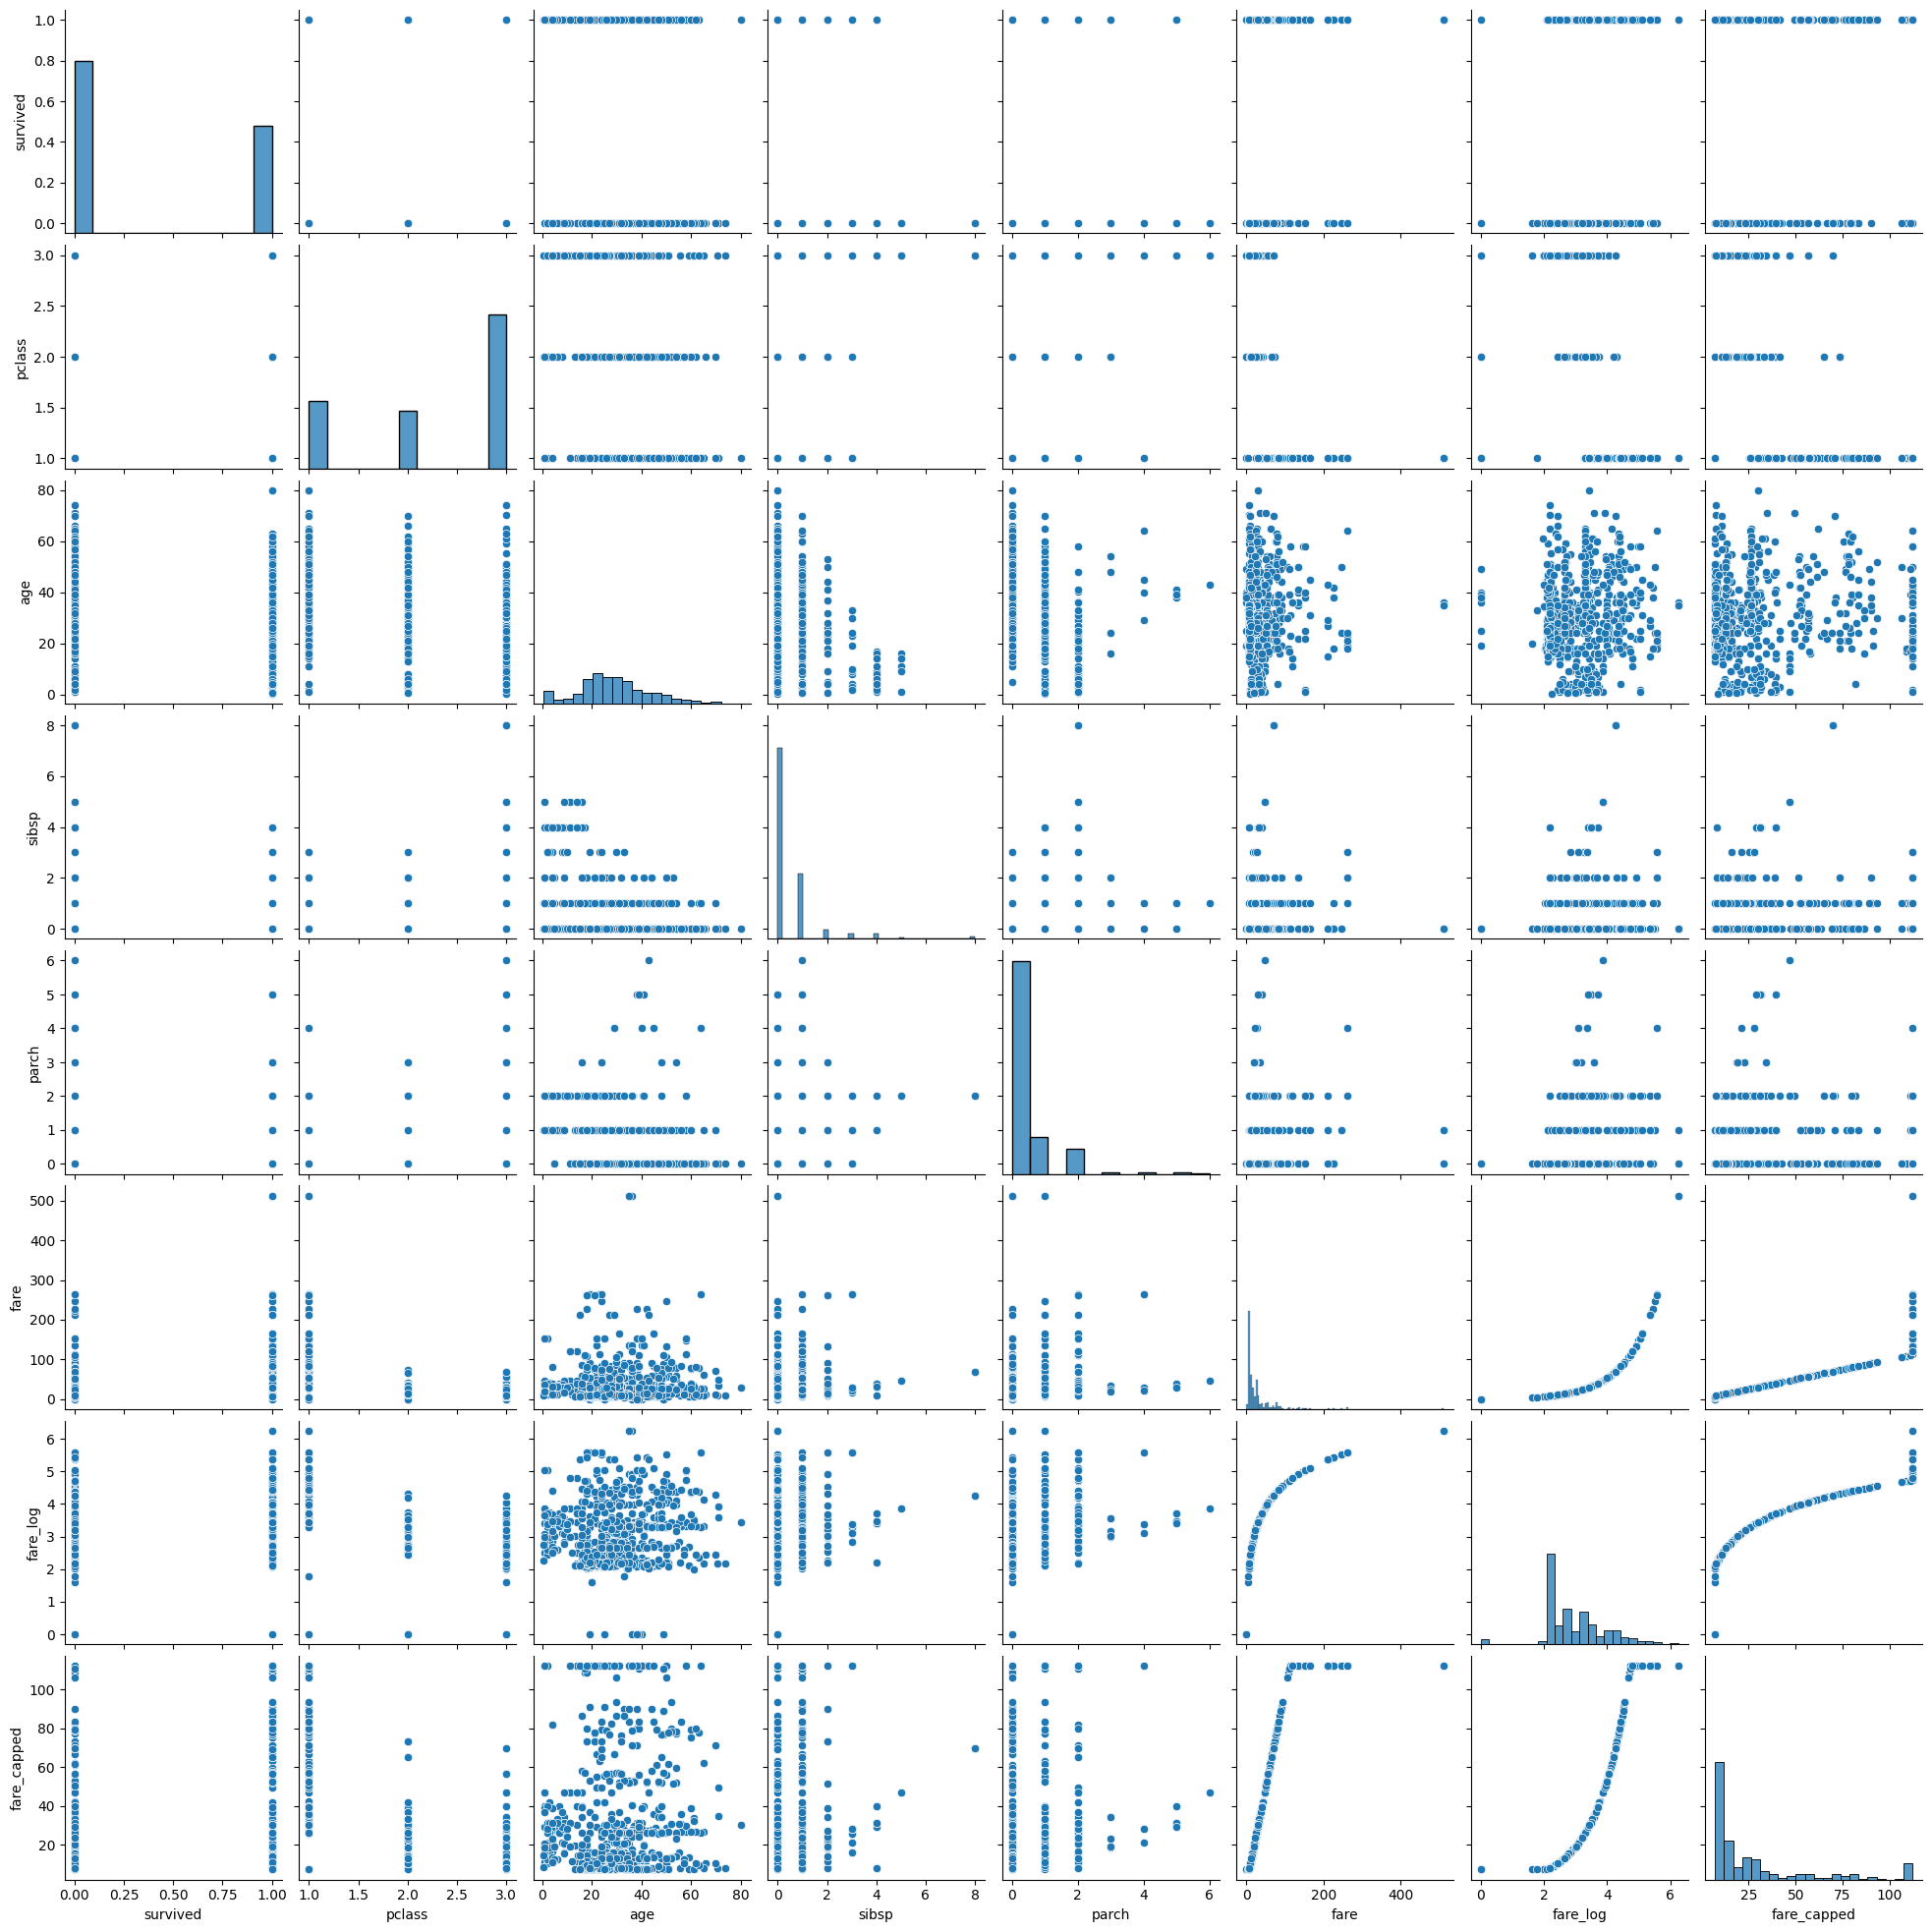

In [ ]:
numerical_cols = titanic.select_dtypes(include=np.number).columns
sns.pairplot(titanic[numerical_cols])
plt.show()

## **Missing Values**

The codes below only display data that has missing value(s). This is possible thanks to the statement: "missing_values > 0". Obviously, the statement alone won't do much, however, by combining it with the ".isnull()" function, it will complete the function and make it effective, and the ".sum" function is used to display the total of the missing values.

In [ ]:
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
missing_values = titanic.isnull().sum()

display(missing_values[missing_values > 0])

,0
age,177
embarked,2
deck,688
embark_town,2


### Heat map of the missing values

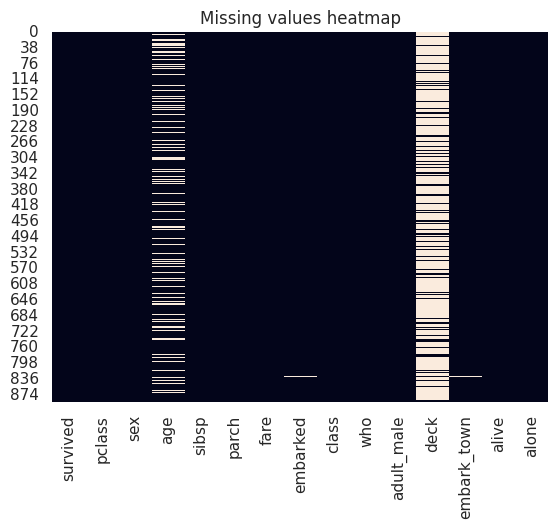

In [ ]:
sns.heatmap(titanic.isnull(), cbar=False)
plt.title('Missing values heatmap')
plt.show()

This cell creates a heatmap of missing values using Seaborn. The dataset is passed through titanic.isnull(), which produces a DataFrame of Boolean values (True for missing, False for present) to visualize missing values in the dataset. Each missing entry is highlighted, making it easy to see which columns (like age or embarked) have gaps and whether the missing data is random or follows a pattern.

## **Correlation Analysis**

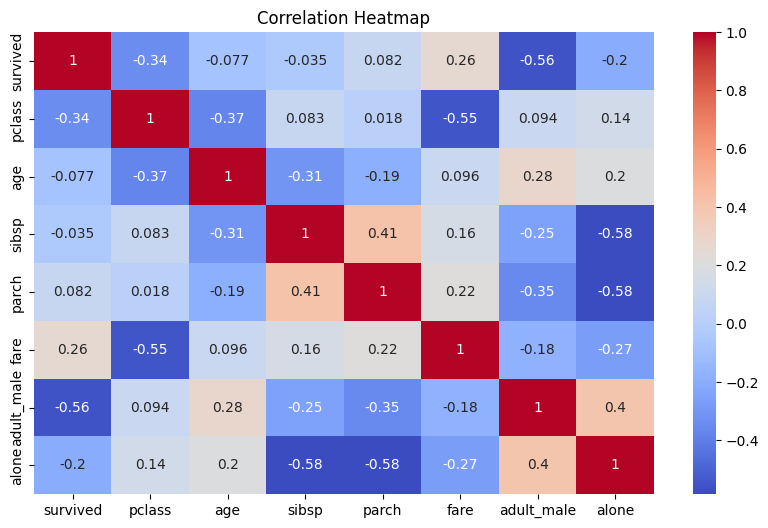

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

A correlation heatmap shows how strongly numeric features are related to each other. Values close to +1 or –1 indicate strong relationships, while values near 0 show weak or no correlation. In the Titanic dataset, it helps reveal patterns such as fare being positively related to survival and passenger class being negatively related, which can guide feature selection for modeling.

# **Outliers Detection**

Outliers are data points that fall far outside the normal range of a feature, such as unusually high fares or extreme ages in the Titanic dataset. They can distort statistical analysis and affect model performance, so it’s important to detect them. By identifying both the specific values and the number of outliers in each column, we can decide whether to keep them as genuine rare cases or handle them through methods like removal or transformation.

In [ ]:
from matplotlib.cbook import boxplot_stats

for col in numerical_cols:
    # Use dropna() to exclude missing values for outlier calculation
    outliers = boxplot_stats(titanic[col].dropna()).pop(0)['fliers']
    print(f"Outliers in {col}: {outliers}")

Outliers in survived: []
Outliers in pclass: []
Outliers in age: [66.  65.  71.  70.5 65.  65.  71.  80.  70.  70.  74. ]
Outliers in sibsp: [3 4 3 3 4 5 3 4 5 3 3 4 8 4 4 3 8 4 8 3 4 4 4 4 8 3 3 5 3 5 3 4 4 3 3 5 4
 3 4 8 4 3 4 8 4 8]
Outliers in parch: [1 2 1 5 1 1 5 2 2 1 1 2 2 2 1 2 2 2 3 2 2 1 1 1 1 2 1 1 2 2 1 2 2 2 1 2 1
 1 2 1 4 1 1 1 1 2 2 1 2 1 1 1 2 1 1 2 2 2 1 1 2 2 1 2 1 1 1 1 1 1 1 2 1 2
 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 4 1 1 2 2 2 2 2 1 1 1 2 2 1 1 2 2 3 4 1 2 1
 1 2 1 2 1 2 1 1 2 2 1 1 1 1 2 2 2 2 2 2 1 1 2 1 4 1 1 2 1 2 1 1 2 5 2 1 1
 1 2 1 5 2 1 1 1 2 1 6 1 2 1 2 1 1 1 1 1 1 1 3 2 1 1 1 1 2 1 2 3 1 2 1 2 2
 1 1 2 1 2 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 3 2 1 1 1 1 5 2]
Outliers in fare: [ 71.2833 263.     146.5208  82.1708  76.7292  80.      83.475   73.5
 263.      77.2875 247.5208  73.5     77.2875  79.2     66.6     69.55
  69.55   146.5208  69.55   113.275   76.2917  90.      83.475   90.
  79.2     86.5    512.3292  79.65   153.4625 135.6333  77.9583  78.85
  91.0792 151

with ".dropna" function

In [ ]:
# Display number of outliers without considering the missing values

from matplotlib.cbook import boxplot_stats

numerical_cols = titanic.select_dtypes(include=np.number).columns

for col in numerical_cols:
    outliers = boxplot_stats(titanic[col].dropna()).pop(0)['fliers']
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in survived: 0
Number of outliers in pclass: 0
Number of outliers in age: 11
Number of outliers in sibsp: 46
Number of outliers in parch: 213
Number of outliers in fare: 116


without ".dropna" function

In [ ]:
# Display number of outliers considering the missing values

from matplotlib.cbook import boxplot_stats

numerical_cols = titanic.select_dtypes(include=np.number).columns

for col in numerical_cols:
    outliers = boxplot_stats(titanic[col]).pop(0)['fliers']
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in survived: 0
Number of outliers in pclass: 0
Number of outliers in age: 0
Number of outliers in sibsp: 46
Number of outliers in parch: 213
Number of outliers in fare: 116


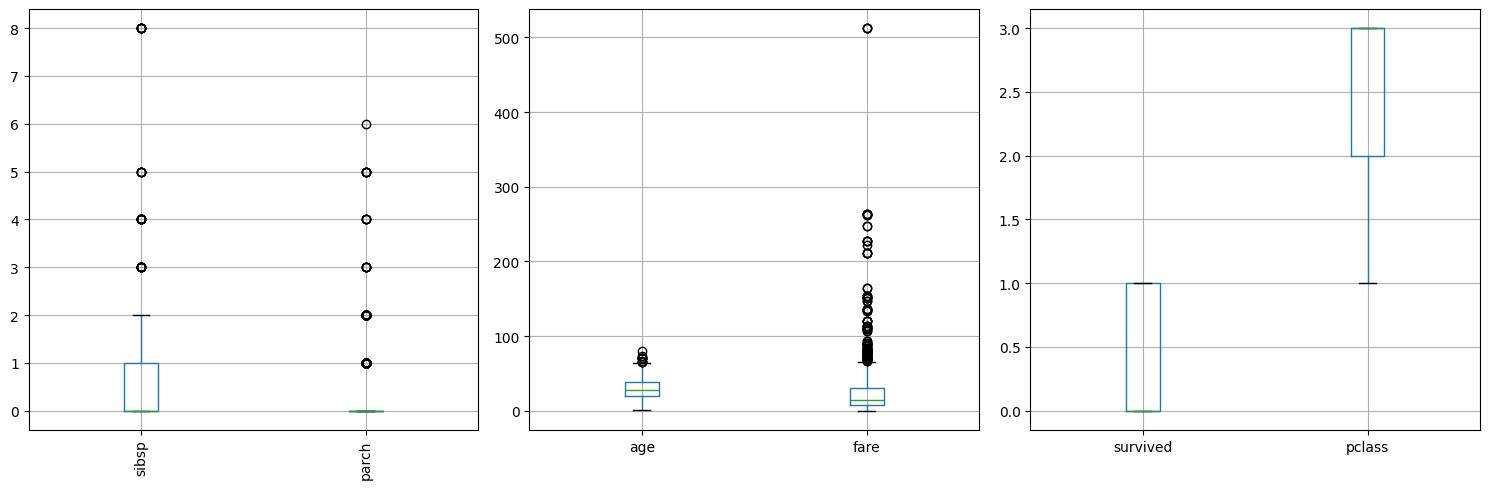

In [ ]:
small = ['sibsp', 'parch']
medium = ['age', 'fare']
large = ['survived', 'pclass']

f, axs = plt.subplots(1,3,figsize=(15,5))

ax1=plt.subplot(1, 3, 1)
titanic.boxplot(column=small, ax = ax1)
plt.xticks(rotation=90)

ax2=plt.subplot(1, 3, 2)
titanic.boxplot(column=medium, ax = ax2)

ax3=plt.subplot(1, 3, 3)
titanic.boxplot(column=large, ax = ax3)

plt.tight_layout()
plt.show()

Draws boxplots for selected groups of variables (sibsp and parch, age and fare, survived and pclass) side by side. This allows comparison of spread and outliers across multiple features.

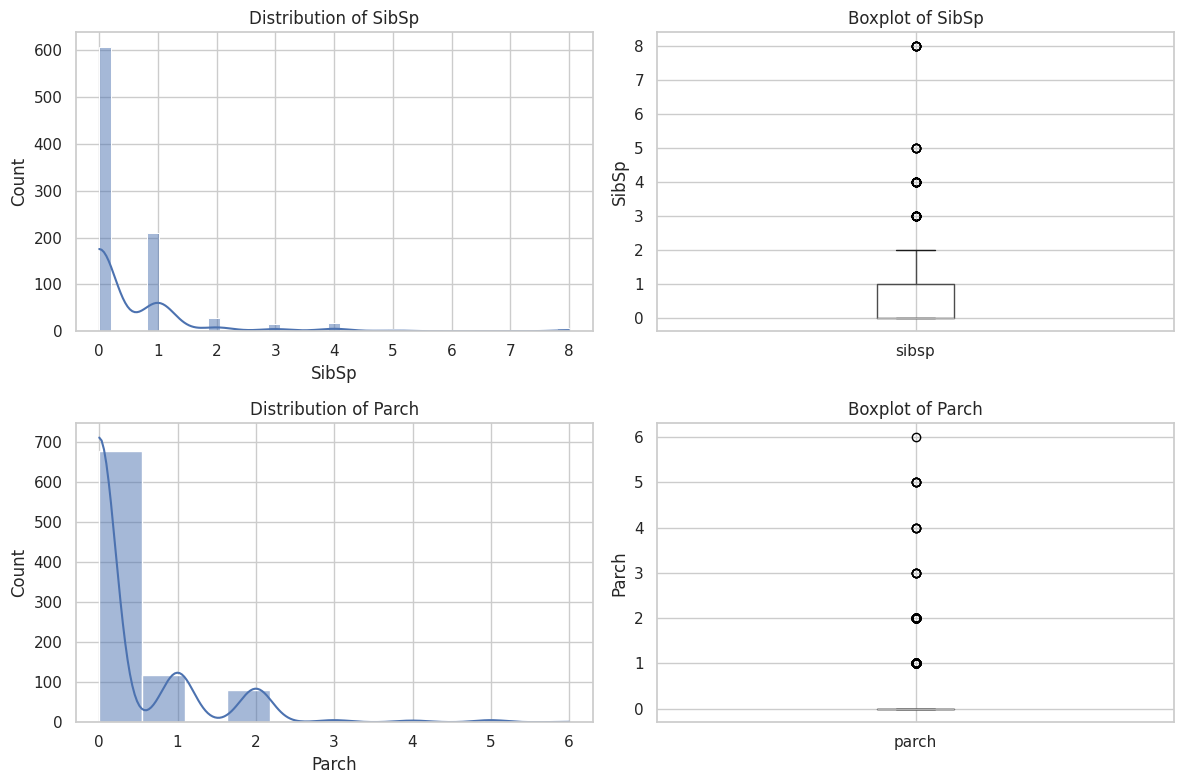

In [ ]:
f, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(titanic['sibsp'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of SibSp')
axs[0, 0].set_xlabel('SibSp')
axs[0, 0].set_ylabel('Count')

titanic.boxplot(column=['sibsp'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of SibSp')
axs[0, 1].set_ylabel('SibSp')

sns.histplot(titanic['parch'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Parch')
axs[1, 0].set_xlabel('Parch')
axs[1, 0].set_ylabel('Count')

titanic.boxplot(column=['parch'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of Parch')
axs[1, 1].set_ylabel('Parch')


plt.tight_layout()
plt.show()

Plots distributions (histograms) and boxplots for sibsp (siblings/spouses aboard) and parch (parents/children aboard). This shows their distributions and detects outliers.

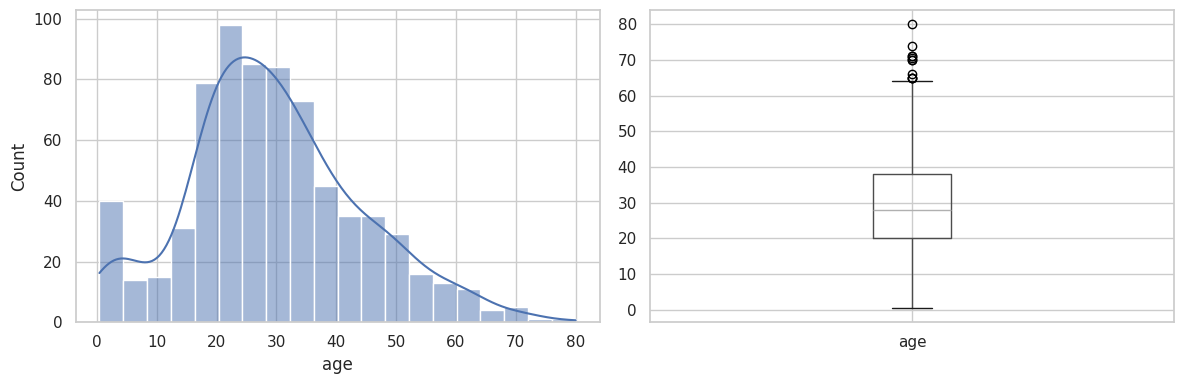

In [ ]:
f, axs = plt.subplots(1,2,figsize=(12,4))

ax1=plt.subplot(1, 2, 1)
sns.histplot(titanic['age'].dropna(), kde=True, ax=ax1)

ax2=plt.subplot(1, 2, 2)
titanic.boxplot(column=['age'], ax = ax2)

plt.tight_layout()
plt.show()

Plots a histogram and a boxplot for age. The histogram shows age distribution, while the boxplot highlights spread and outliers.

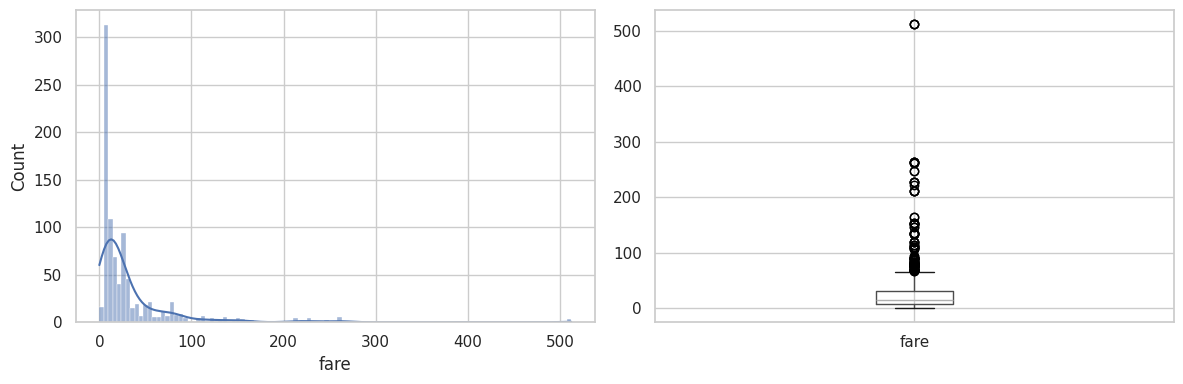

In [ ]:
f, axs = plt.subplots(1,2,figsize=(12,4))

ax1=plt.subplot(1, 2, 1)
sns.histplot(titanic['fare'], kde=True, ax=ax1)

ax2=plt.subplot(1, 2, 2)
titanic.boxplot(column=['fare'], ax = ax2)

plt.tight_layout()
plt.show()

Plots a histogram and a boxplot for fare. Like with age, the histogram shows how fares are distributed, and the boxplot reveals skewness and outliers.

# Preprocessing Recommendations Based on EDA

Based on the exploratory data analysis, here are some recommendations for further preprocessing:

*   **Missing Values:** Address missing data in 'age' (impute with mean/median or KNN), 'embarked' and 'embark_town' (impute with mode or drop rows), and 'deck' (drop column or impute with 'Unknown' due to high missingness).
*   **Outliers:** Consider handling outliers in 'age' and 'fare' (capping or transformation) and 'sibsp' and 'parch' (capping or keeping as is).
*   **Feature Encoding:** Encode categorical features ('sex', 'embarked', 'class', etc.) using one-hot or label encoding.
*   **Feature Scaling:** Scale numerical features ('age', 'fare') using standardization or normalization if required for modeling.
